In [38]:
from duckduckgo_search import ddg_images
from duckduckgo_search import DDGS
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
from fastai.vision.data import *
from time import sleep

from fastai.vision.widgets import *

In [3]:
def search_images(term, max_images=200):
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [7]:
urls = search_images('hebrew alphabet', max_images=1)
urls[0]

'https://good-evening-europe.dk/wp-content/uploads/2019/04/Hebrew-Alphabet.jpg'

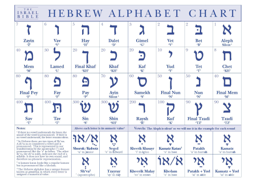

In [8]:
dest = 'hebrew.jpg'
download_url(urls[0], dest, show_progress=True)

img = Image.open(dest)
img.to_thumb(256, 256)

In [12]:
alphabet_types = 'hebrew','portugues'
path = Path('alphabet')

In [15]:
for type in alphabet_types:
        dest = (path/type)
        dest.mkdir(exist_ok=True, parents=True)
        download_images(dest, urls=search_images(f'{type} alphabet'))
        sleep(10)
        download_images(dest, urls=search_images(f'{type} poems in {type}'))
        sleep(10)
        download_images(dest, urls=search_images(f'{type} frases in {type}'))
        sleep(10)

In [21]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

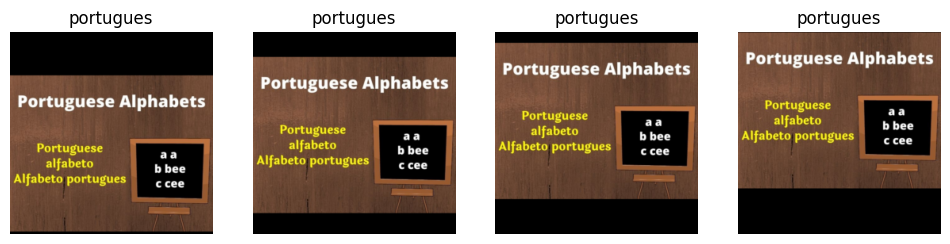

In [26]:
alphabet_dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(256, ResizeMethod.Pad, pad_mode='zeros')
).dataloaders(path)

alphabet_dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [28]:
learn = vision_learner(alphabet_dls, resnet18, metrics=error_rate)
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.344832,0.709483,0.416667,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.785904,0.633221,0.321429,00:03
1,0.645207,0.516029,0.238095,00:03
2,0.541014,0.432699,0.166667,00:03
3,0.435835,0.351136,0.142857,00:03
4,0.368734,0.300943,0.130952,00:03
5,0.310146,0.286158,0.130952,00:03


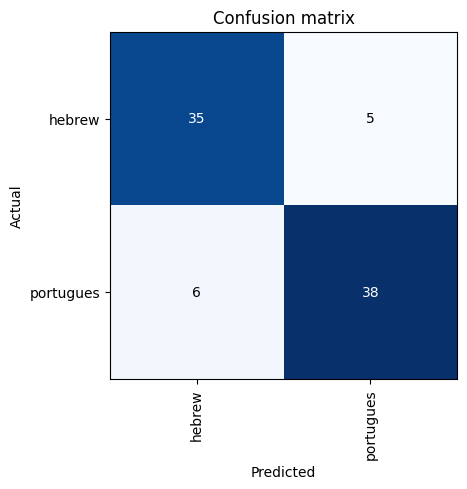

In [29]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

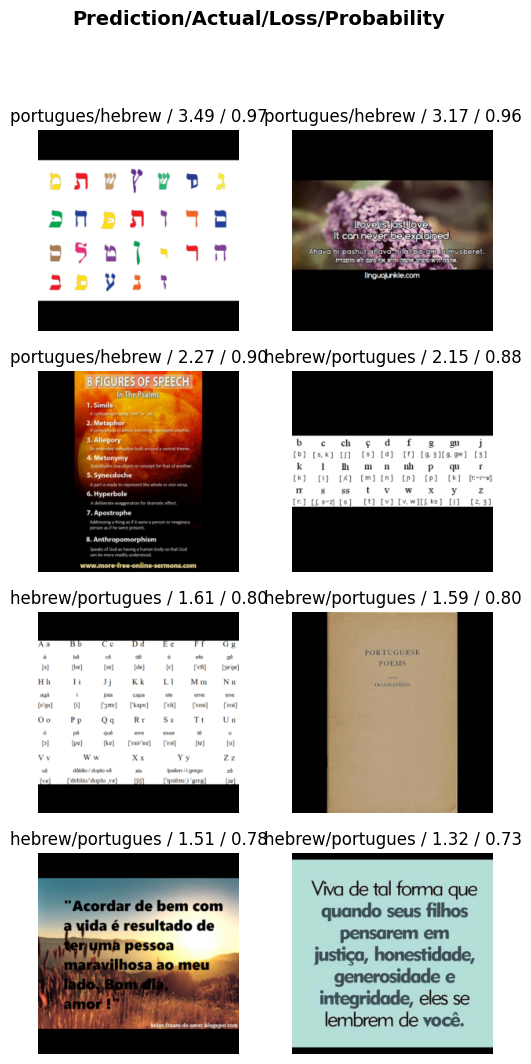

In [36]:
interp.plot_top_losses(8, nrows=4)

In [39]:
cleaner = ImageClassifierCleaner(learn)
cleaner